# Calculate geometric eigenmodes

To calculate the geometric eigenmodes of a brain surface using the method outlined in [Pang *et al.* 
 (2023)](https://doi.org/10.1038/s41586-023-06098-1), we will first initialise the solver with a
 path to a surface file. Since `neuromodes` provides triangular surface meshes for human, macaque, and 
 marmoset cortices, we can provide these as follows:

In [ ]:
from importlib.resources import files, as_file
from nsbutils.plotting import plot_surf
from nsbutils.utils import unmask
from neuromodes import EigenSolver
from neuromodes.io import fetch_surf

# Load cortical surface mesh
mesh, medmask = fetch_surf()

# Initialise solver with surface
solver = EigenSolver(mesh)

Note that by default, `fetch_surf` will return the human left hemisphere fsLR-32k midthickness mesh 
and medial wall mask.

Next, we can compute eigenmodes and eigenvalues by solving the eigenvalue problem of the Laplace-Beltrami operator on the surface mesh:

In [2]:
solver.solve(100)


Note that we specified the first 100 eigenmodes and eigenvalues, which are then stored in the
 `emodes` and `evals` attributes. We can visualize a few modes by using `plot_surf` from our sister
 package `nsbutils`:

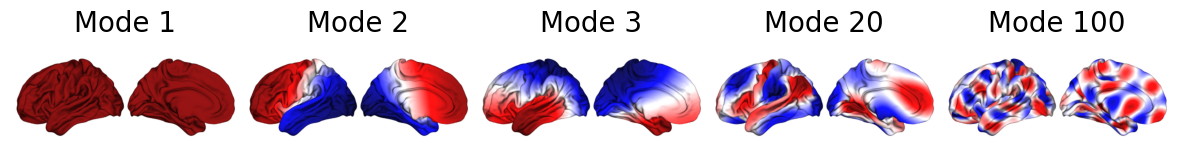

In [3]:
lh_surfpath = files('neuromodes.data') / 'sp-human_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
with as_file(lh_surfpath) as lh_surfpath:
    plot_surf(lh_surfpath, solver.emodes[:,[0,1,2,19,99]], labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 20', 'Mode 100'], cmap='seismic_r')


We can see that the modes have been calculated, but incorrectly included the medial wall. To exclude
 the medial wall, we can either use a surface file that has the medial wall removed, or provide a 
 boolean mask when initialising the solver. The same mask is then provided to our `unmask` function
 (also from `nsbutils`) to reintroduce the medial wall for plotting. We can try this now with a
 marmoset surface:


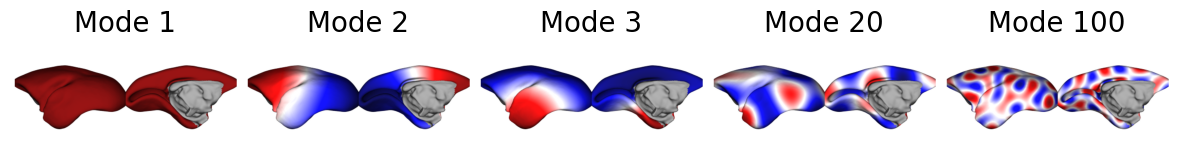

In [ ]:
# Load medial wall mask
marmo_mesh, marmo_medmask = fetch_surf(species='marmoset')
marmo_solver = EigenSolver(marmo_mesh, mask=marmo_medmask)

# Solve the eigenvalue problem
marmo_solver.solve(100)

# Visualise on the cortical surface
marmodes_unmasked = unmask(marmo_solver.emodes[:,[0,1,2,19,99]], marmo_medmask)
marmo_lh_surfpath = files('neuromodes.data') / 'sp-marmoset_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
with as_file(marmo_lh_surfpath) as marmo_lh_surfpath:   
    plot_surf(marmo_lh_surfpath, marmodes_unmasked, labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 20', 'Mode 100'], cmap='seismic_r')